In [5]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***`Importing Libraries`***

---



---



In [3]:
#data analysis libraries
import numpy as np
import pandas as pd
import math
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# ***`Loading and reading the data`***

---



---



In [7]:
data=pd.read_csv('/content/drive/MyDrive/data.csv.xls')

In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
import ipywidgets as widgets
from ipywidgets import interact
@interact
def summary(conditions=['N','P','K','temperature','humidity','ph','rainfall']):
   print(data.groupby(['label']).agg({conditions : ['mean','max','min','std']}))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [11]:
@interact
def newdata (conditions=['N','P','K','temperature','humidity','ph','rainfall']) :
  print("crops that required greater than average", conditions)
  print(data[data[conditions] >= data[conditions].mean()]['label'].unique())
  print("__________________________________________________________________________")

  print("crops that required less than average", conditions)
  print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

# ***`Data distribution`***

---



---




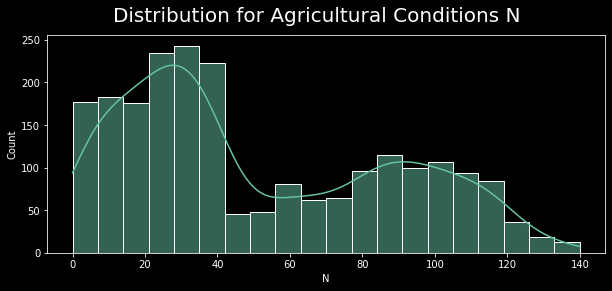

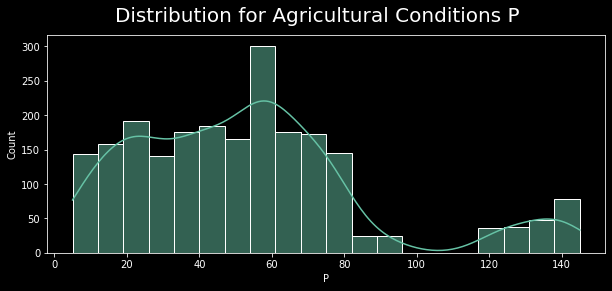

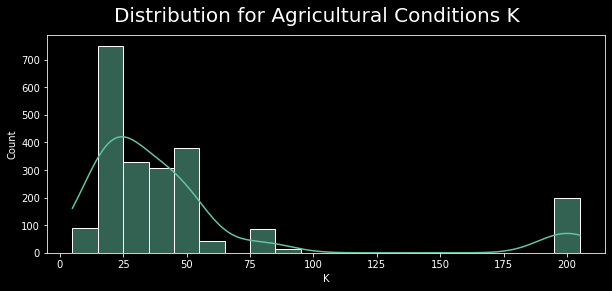

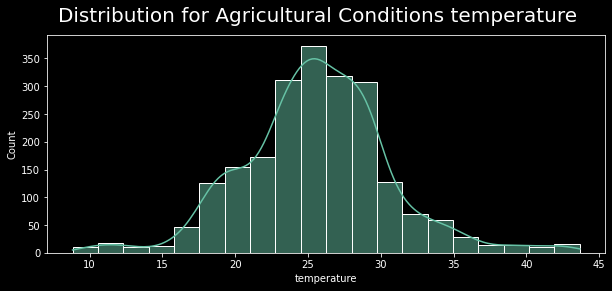

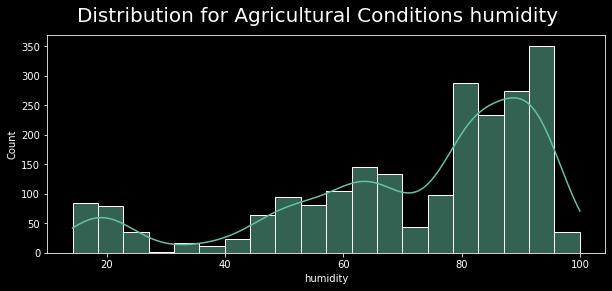

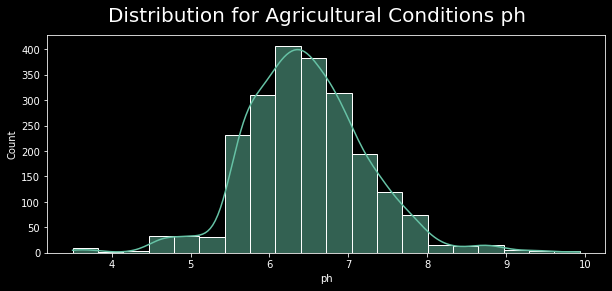

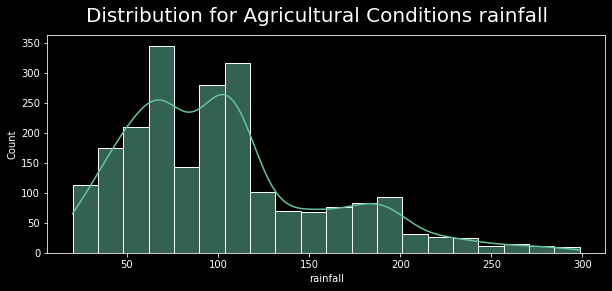

In [12]:
plt.style.use('dark_background')
sns.set_palette("Set2")
for i in data.columns[:-1]:
    fig,ax=plt.subplots(figsize=(10,4))
    sns.histplot(data=data,x=i,kde=True,bins=20)
    plt.suptitle(f'Distribution for Agricultural Conditions {i}',size=20)

In [13]:
#Checking that crops those have unusual requirements
print("Some Interesting Patterns")
print("__________________________________________________________________________-")
print("Crops that require very High Ratio of Nitrogen Content in Soil:", data[data['N'] > 120]['label'].unique())
print("Crops that require very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique())
print("Crops that require very High Ratio of Potassium Content in Soil:", data[data['K'] > 200]['label'].unique())
print("Crops that require very High Temperature :", data[data['temperature'] < 10]['label'].unique())
print("Crops that require very low Temperature  :", data[data['temperature'] > 40]['label'].unique())
print("Crops that require very High Rainfall :", data[data['rainfall'] > 200]['label'].unique())
print("Crops that require very low Humidity :", data[data['humidity'] < 20]['label'].unique())
print("Crops that require very high Humidity :", data[data['humidity'] > 100]['label'].unique())
print("Crops that require very low PH level :", data[data['ph'] < 4]['label'].unique())
print("Crops that require very high PH level :", data[data['ph'] > 9]['label'].unique())

Some Interesting Patterns
__________________________________________________________________________-
Crops that require very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops that require very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops that require very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops that require very High Temperature : ['grapes']
Crops that require very low Temperature  : ['grapes' 'papaya']
Crops that require very High Rainfall : ['rice' 'papaya' 'coconut']
Crops that require very low Humidity : ['chickpea' 'kidneybeans']
Crops that require very high Humidity : []
Crops that require very low PH level : ['mothbeans']
Crops that require very high PH level : ['mothbeans']


In [14]:
#Checking which crop to be grown according to the season
print("Summer Crops") 
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("__________________________________________________________________________-")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("__________________________________________________________________________-")
print("Monsoon Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())


Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
__________________________________________________________________________-
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
__________________________________________________________________________-
Monsoon Crops
['rice' 'papaya' 'coconut']


(2200, 7)


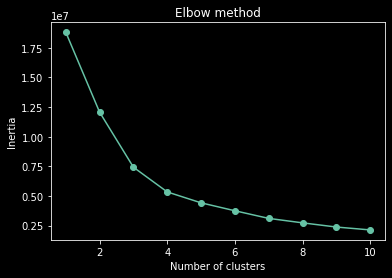

In [15]:
newfeatures=data.drop(['label'],axis=1)
newfeatures=newfeatures.values

print(newfeatures.shape) 

inertias = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(newfeatures)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
km = KMeans(n_clusters = 4, init = 'k-means++',  max_iter = 2000, n_init = 10, random_state = 0)
y_means = km.fit_predict(newfeatures)

a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

print("Lets Check the results after applying K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("__________________________________________________________________________-")

print("Crops in second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("__________________________________________________________________________-")

print("Crops in third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("__________________________________________________________________________-")

print("Crops in Fourth Cluster:", z[z['cluster'] == 3]['label'].unique())


Lets Check the results after applying K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
__________________________________________________________________________-
Crops in second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
__________________________________________________________________________-
Crops in third Cluster: ['grapes' 'apple']
__________________________________________________________________________-
Crops in Fourth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [17]:
y = data['label']
x = data.drop(['label'],axis=1)
print(x.shape,y.shape)

(2200, 7) (2200,)


# ***`Splitting the Data`***

---



---



In [18]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.2 , random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1760, 7) (440, 7) (1760,) (440,)


# **`Logistic Regression model `**

---



---



In [19]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['watermelon', 'watermelon', 'grapes', 'chickpea', 'blackgram',
       'jute', 'mothbeans', 'kidneybeans', 'muskmelon', 'banana',
       'mothbeans', 'coffee', 'lentil', 'mungbean', 'mango', 'apple',
       'coffee', 'lentil', 'coffee', 'mango', 'coconut', 'blackgram',
       'kidneybeans', 'jute', 'cotton', 'coffee', 'lentil', 'orange',
       'mothbeans', 'kidneybeans', 'pomegranate', 'rice', 'maize',
       'muskmelon', 'coconut', 'cotton', 'mango', 'mango', 'watermelon',
       'mothbeans', 'maize', 'blackgram', 'pigeonpeas', 'watermelon',
       'pigeonpeas', 'mungbean', 'kidneybeans', 'kidneybeans', 'cotton',
       'mungbean', 'mothbeans', 'blackgram', 'apple', 'muskmelon',
       'pigeonpeas', 'banana', 'papaya', 'mango', 'lentil', 'cotton',
       'orange', 'mungbean', 'watermelon', 'rice', 'muskmelon', 'apple',
       'grapes', 'coffee', 'apple', 'orange', 'coconut', 'pomegranate',
       'kidneybeans', 'maize', 'grapes', 'mothbeans', 'chickpea', 'maize',
       'jute',

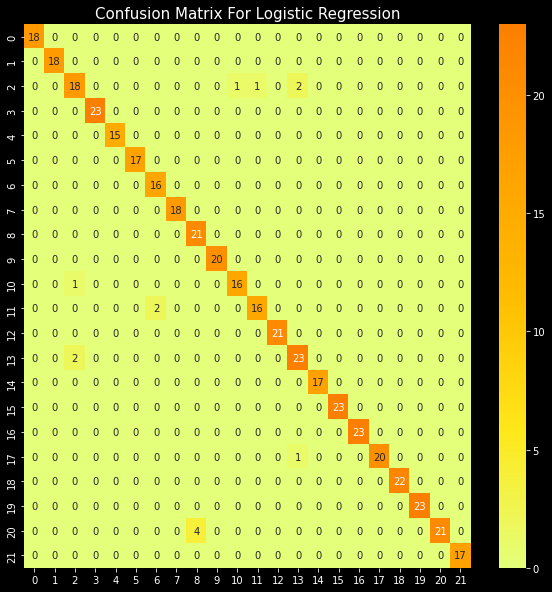

In [20]:
plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix For Logistic Regression', fontsize = 15)
plt.show()

In [21]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [22]:
prediction = model.predict((np.array([[90, 40, 40, 20, 80, 7, 200]])))
print("The Suggested Crop for given climatic condition is :",prediction)

The Suggested Crop for given climatic condition is : ['rice']


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# ***`Random Forest Classifier model`***

---



---



In [23]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
acc_randomforest = round(accuracy_score(y_pred,y_test) * 100, 2)
print(acc_randomforest)

99.77
